In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# Import some modules from ase and Nanoparticle Library
from ase.visualize import view
from Core import Nanoparticle as NP
from Core.Adsorption import PlaceAddAtoms

In [25]:
p = NP.Nanoparticle()
p.truncated_octahedron(5,0,{'Ag':1})
p.construct_adsorption_list()
n_sites = p.get_total_number_of_sites()
print('Your structure has {} adsorption sites'.format(n_sites))

Resulting stoichiometry: {'Ag': 85}
Your structure has 386 adsorption sites


In [26]:
# Place Add atoms
ads_site_list = p.get_adsorption_list()
#on_top = [list(x) for x in ads_site_list if len(x) == 1]
ads_placer = PlaceAddAtoms(p.get_all_symbols())
ads_placer.bind_particle(p)
for f in range(0, n_sites):
    p_with_adsorbates = ads_placer.place_add_atom(p, 'O', [list(ads_site_list[f])])
    
view(p_with_adsorbates.get_ase_atoms())

In [246]:
from Core.EnergyCalculator import LateralInteractionCalculator
p = NP.Nanoparticle()
p.truncated_octahedron(5,0,{'Ag':1})

lateral_interaction_calculator = LateralInteractionCalculator()
lateral_interaction_calculator.bind_grid(p)

Resulting stoichiometry: {'Ag': 85}


In [247]:
lateral_interaction_calculator.interaction_matrix.shape

(386, 386)

In [248]:
p.get_occupation_status_by_indices(1)

array([], dtype=int64)

In [250]:
p.construct_adsorption_list()
test = 0
for _ in range(10000):
    p.random_occupation(2)
    lateral_interaction_calculator.compute_energy(p)
    energy = p.get_energy(lateral_interaction_calculator.energy_key)
    if energy > test:
        test = energy
        good = p.get_occupation_status_by_indices(1)
        print(energy)

0.03569614030473832
0.042362144917654755
0.45083122006198945
0.4508312200619896
0.7889546351084817
3.155818540433924
3.1558185404339243
3.155818540433927
3.15581854043393
3.155818540433931
3.155818540433937


In [251]:
ads_site_list = p.get_adsorption_list()
for f in good:
    p_with_adsorbates = ads_placer.place_add_atom(p, 'O', [list(ads_site_list[f])])

In [252]:
view(p_with_adsorbates.get_ase_atoms())

In [54]:
import numpy as np

def construct_adsorbate_grid(particle):
    from Core.Adsorption import PlaceAddAtoms
    particle.construct_adsorption_list()
    n_sites = particle.get_total_number_of_sites()
    ads_site_list = particle.get_adsorption_list()
    ads_placer = PlaceAddAtoms(particle.get_all_symbols())
    ads_placer.bind_particle(particle)
    for f in range(0, n_sites):
        particle = ads_placer.place_add_atom(particle, 'O', [list(ads_site_list[f])])
    return particle

def get_adsorbate_distance_matrix(particle, n_atoms_np):
    ase_atoms = particle.get_ase_atoms()
    adsorbate_all_distances = ase_atoms.get_all_distances()[n_atoms_np:]
    distance_matrix = np.array([row[n_atoms_np:] for row in adsorbate_all_distances])
    return distance_matrix

def construct_interatomic_potential_matrix(particle):
    n_atoms_np = particle.get_n_atoms()
    particle = construct_adsorbate_grid(particle)
    distance_matrix = get_adsorbate_distance_matrix(p_with_adsorbates, 85)
    interaction_matrix = np.zeros(distance_matrix.shape)
    interaction_matrix = 2/distance_matrix**2
    return interaction_matrix

def calculate_lateral_interaction(particle):
    energy = 0
    I = construct_interatomic_potential_matrix(particle)
    particle.random_occupation(10)
    sites_occupied = particle.get_occupation_status_by_indices(1)
    for index, site in enumerate(sites_occupied):
        for other_site in sites_occupied[index+1:]:
            energy += I[site][other_site]
    return energy
        

In [55]:
p = NP.Nanoparticle()
p.truncated_octahedron(5,0,{'Ag':1})
calculate_lateral_interaction(p)

Resulting stoichiometry: {'Ag': 85}


<ipython-input-54-2d08d901f6a5>:25: RuntimeWarning: divide by zero encountered in true_divide
  interaction_matrix = 2/distance_matrix**2


2.4064912968435914

In [61]:
p.get_ase_atoms()[85].symbol = 'C'
p.get_ase_atoms()[0].symbol = 'C'
view(p.get_ase_atoms())

<ipython-input-10-6629cb63a205>:12: RuntimeWarning: divide by zero encountered in true_divide
  interaction_matrix = 2/distance_matrix**2


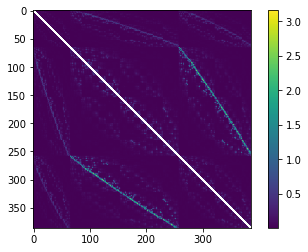

In [15]:
import matplotlib.pyplot as plt
I = constructu_interatomic_potential_matrix(p_with_adsorbates, 85)

plt.imshow(I)
plt.colorbar()
plt.show()

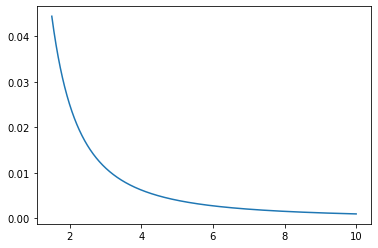

In [12]:
import matplotlib.pyplot as plt

def f(x):
    return a/x**2
    
    
distance = np.linspace(1.5,10,1000)
energy = np.zeros((len(distance),1))
energy = 0.1/distance**2

plt.plot(distance, energy)

<ipython-input-22-cf11689ee016>:7: RuntimeWarning: divide by zero encountered in double_scalars
  plt.scatter(f, 1/f)


Text(0, 0.5, 'correction')

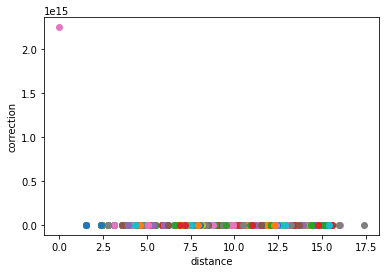

In [22]:
import matplotlib.pyplot as plt
atoms = p_with_adsorbates.get_ase_atoms()
D = atoms.get_all_distances()[146:]
Di = np.array([row[146:] for row in D])

for f in Di[0]:
    plt.scatter(f, 1/f)
plt.xlabel('distance')
plt.ylabel('correction')

In [173]:
for atom in p_with_adsorbates.get_atom_indices_from_coordination_number([7]):
    p.get_atoms(atom).symbol = 'Au'
    
view(p_with_adsorbates.get_ase_atoms())

In [ ]:
from Core import MathModules as math
positions = []
for edge in p.get_atom_indices_from_coordination_number([7]):
    positions = [p.get_position(edge)]
    for neighbor in p.get_coordination_atoms(edge):
        if p.get_coordination_number(neighbor) == 7:
            positions.append(p.get_position(neighbor))
            print(math.get_bridge_perpendicular_line(positions, p.atoms.atoms.get_center_of_mass())  )    
            break
    else:
        print('no tiene')      

In [ ]:
import itertools 
import numpy as np

p = NP.Nanoparticle()
p.truncated_octahedron(6,0,{'Ag':1})

for atom in p.get_atom_indices_from_coordination_number(range(12)):
    for surface in [[1,0,0], [-1,0,0], [0,1,0], [0,-1,0], [0,0,1], [0,0,1]]:
        mi_vec = surface / np.linalg.norm(surface)
        pos_vec = p.get_position(atom)/ np.linalg.norm(p.get_position(atom))
        if np.dot(mi_vec, pos_vec) > 0.99:
            p.get_atoms(atom).symbol = 'Au'
view(p.get_ase_atoms())        

In [ ]:
planes = [plane for plane in itertools.product([1,-1],3)]
planes

In [ ]:
import itertools

planes = [plane for plane in itertools.combinations_with_replacement([1,-1],3) if plane != (0,0,0)]
for f in itertools.combinations_with_replacement([-1,1],3):
    if f not in planes:
        planes.append(f)
        
planes

In [ ]:
import copy

def find_atom_plane_vec(particle, atom_idx):
    normal_vector = 0
    pos_vec = particle.get_position(atom_idx)/ np.linalg.norm(particle.get_position(atom_idx))
    planes = [plane for plane in itertools.combinations_with_replacement([1,-1,0],3) if plane != (0,0,0)]
    for plane in planes:
        mi_vec = plane / np.linalg.norm(plane)
        dot_prod = np.dot(mi_vec, pos_vec)
        if dot_prod > normal_vector:
            normal_vector = dot_prod
            direction = copy.copy(mi_vec)
    return direction
        

In [ ]:
for atom in p.get_atom_indices_from_coordination_number(range(12)):
    print(find_atom_plane_vec(p, atom))

In [ ]:
[0,0,0] / np.linalg.norm([0,0,0])